### Evaluation

Research Questions:

1. What is the similarity between search engines?

2. What is the evolution of the similarity over time?

3. What is the impact of every criterion (e.g., snippets, titles, transpositions) on the similarity?

4. How does the similarity of search engines change long-term?

5. What is the correlation of the metric T with other existing approaches?

6. How does the nature of queries affect the similarity of search engines?


## RQ1: What is the similarity between search engines?

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelweight'] = 'bold'

In [2]:
import itertools
import os
import numpy as np
import pandas as pd
import seaborn as sns
from seanalysis import utils
from seanalysis.compare_sorting import find_distance
from seanalysis.drawing.visualization import Visualization

In [3]:
# Download data
import subprocess
from subprocess import Popen, PIPE

def download_data():
    command = [
        '../scripts/download-data.sh',
        '../web-results'
    ]
    process = Popen(command, stderr=PIPE, stdout=PIPE, preexec_fn=os.setsid)
    _, stderr = process.communicate()

    if process.returncode != 0:
        raise Exception('Command {!s} returned a non zero exit code: {!s}'.format(
            ' '.join(command), stderr.decode('utf-8')))
        
download_data()

In [4]:
CATEGORIES = [
    'Regions',
    'Politicians',
    'Music & Artists',
    'Sports',
    'Drinks & Food',
    'Universities',
    'Software Technologies',
    'Multinational Companies',
    'TV & Cinema',
    'Books & Authors',
]

SEARCH_ENGINES = [
    'bing',
    'google',
    'duckduckgo',
]


SEARCH_ENGINE_READABLE_NAMES = {
    'bing': 'Bing',
    'duckduckgo': 'DDG',
    'google': 'Google',
}


def extract_path(sA, sB, query_category, metric, time='2016'):
    filename = '_'.join([sA, sB, query_category, metric, time])
    return os.path.join('../data', filename)

def save_data(obj, sA, sB, query_category, method='T', time='2016'):
    path = extract_path(sA, sB, query_category, method, time)
    os.makedirs(path.rsplit(os.sep, 1)[0])
    np.save(path, obj)

    
def load_data(sA, sB, query_category, method='T', time='2016'):
    path = extract_path(sA, sB, query_category, method, time)
    return np.load(path + '.npy')


In [5]:
def compute_metric_sim(sA, sB, results_dir, time, query_category,
                       N=10, metric='T', a=[0.8], b=[1], c=[0.8]):
    path = extract_path(sA, sB, query_category, metric, time)
    search_engines = [sA, sB]
    urls = utils.load_urls(results_dir, query_category, search_engines, N=N)
    snippets = utils.load_snippets(results_dir, query_category, search_engines,
                                   N=N, per_day=False)
    titles = utils.load_titles(results_dir, query_category, search_engines,
                               N=N, per_day=False)
    similarity = find_distance(None, urls, snippets, titles, search_engines,
                               query_category, metric, False, N, a, b, c)
    return similarity
    


def plot_heatmap(similarity, sA, sB, query_category):
    visual = Visualization(False, 1)
    visual.plot_heatmap(similarity[:, :, 0],
                        ['Queries', 'Days'],
                        sA + '-' + sB + '(' + query_category + ')')

    
def compute_similarity(sA, sB, results_dir, query_category, metric, time, N=10,
                       a=[0.8], b=[1.0], c=[0.8], force=False):
    path = extract_path(sA, sB, query_category, metric, time)
    if not force and os.path.exists(path + '.npy'):
        return load_data(sA, sB, query_category, metric, time)
    else:
        similarity = compute_metric_sim(sA, sB, results_dir, time,
                                        query_category, metric=metric, N=N,
                                        a=a, b=b, c=c)
        if not force:
            save_data(similarity, sA, sB, query_category, metric, time)
        return similarity

In [6]:
def plot_similarity_heatmap(results_dir, sA, sB, query_category, metric, time, N=10):
    path = extract_path(sA, sB, query_category, metric, time)
    similarity = compute_similarity(sA, sB, results_dir, query_category, metric, time, N=N)
    plot_heatmap(similarity, sA, sB, query_category)

## Analyzing the results collected in 2016

### Bing-Duckduckgo

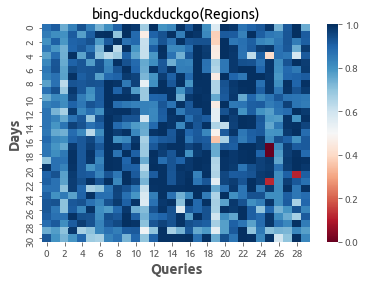

In [7]:
results_dir = os.path.realpath('../web-results/results')
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Regions', 'T', '2016')

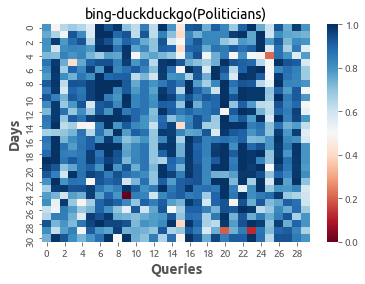

In [8]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Politicians', 'T', '2016')

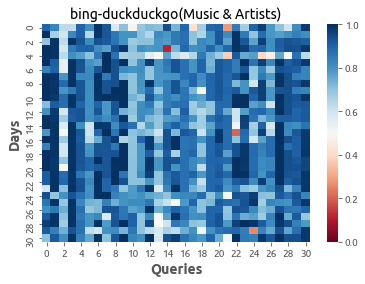

In [9]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Music & Artists', 'T', '2016')

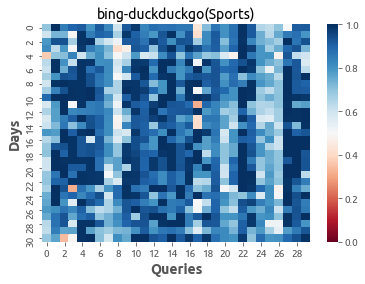

In [10]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Sports', 'T', '2016')

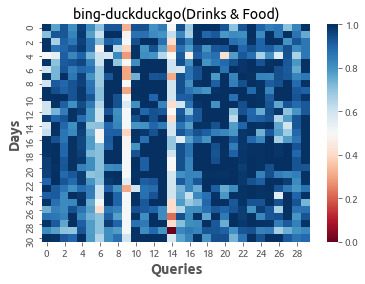

In [11]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Drinks & Food', 'T', '2016')

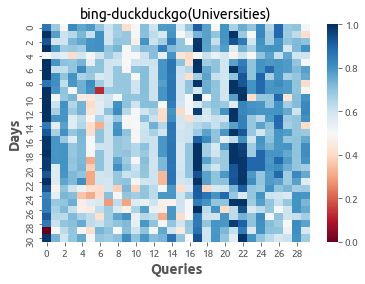

In [12]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Universities', 'T', '2016')

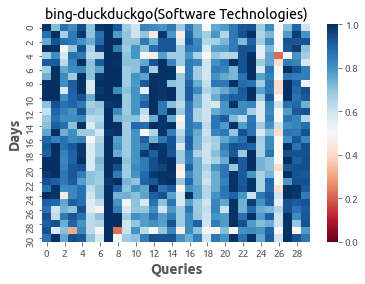

In [13]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Software Technologies', 'T', '2016')

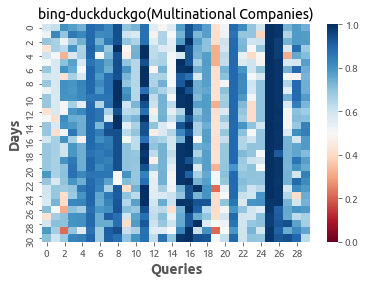

In [14]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Multinational Companies', 'T', '2016')

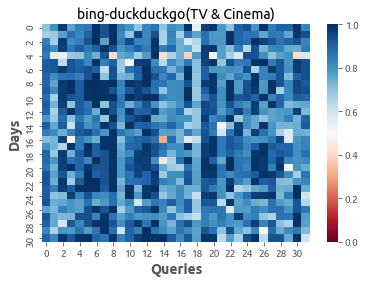

In [15]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'TV & Cinema', 'T', '2016')

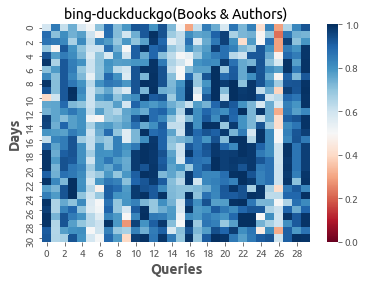

In [16]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Books & Authors', 'T', '2016')

### Bing-Google

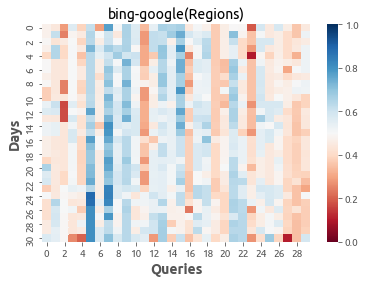

In [17]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Regions', 'T', '2016')

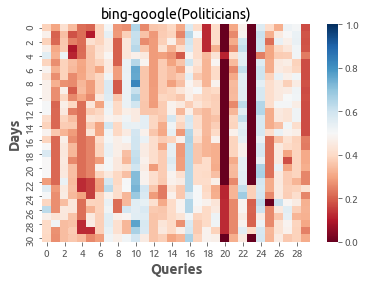

In [18]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Politicians', 'T', '2016')

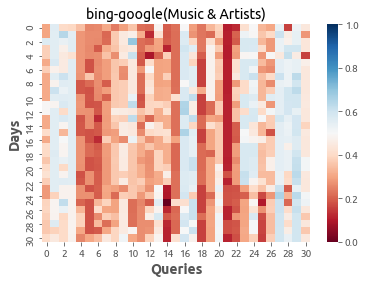

In [19]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Music & Artists', 'T', '2016')

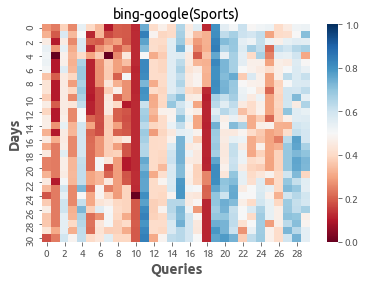

In [20]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Sports', 'T', '2016')

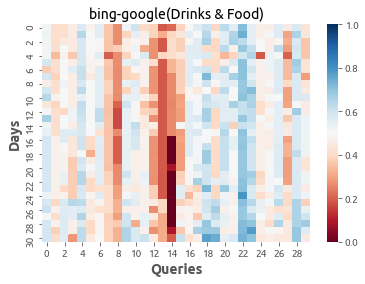

In [21]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Drinks & Food', 'T', '2016')

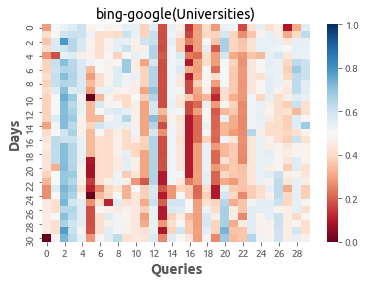

In [22]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Universities', 'T', '2016')

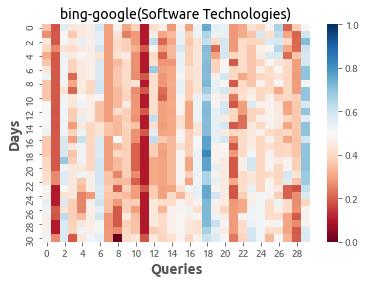

In [23]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Software Technologies', 'T', '2016')

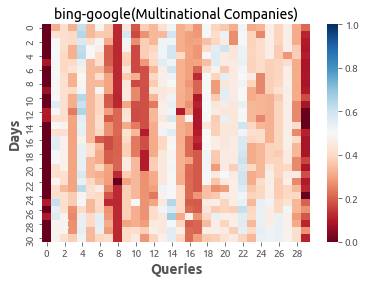

In [24]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Multinational Companies', 'T', '2016')

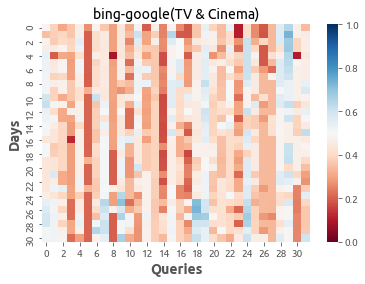

In [25]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'TV & Cinema', 'T', '2016')

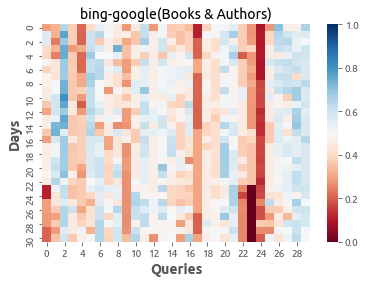

In [26]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Books & Authors', 'T', '2016')

### Google-Duckduckgo

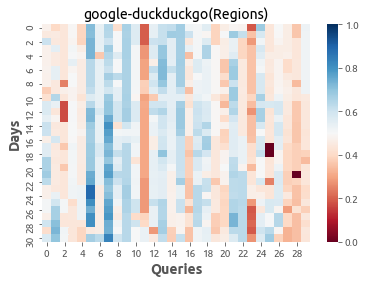

In [27]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Regions', 'T', '2016')

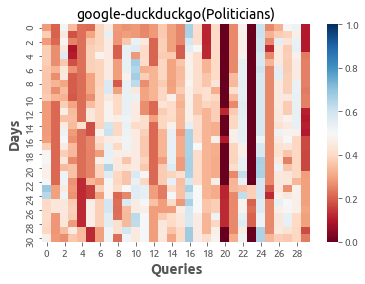

In [28]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Politicians', 'T', '2016')

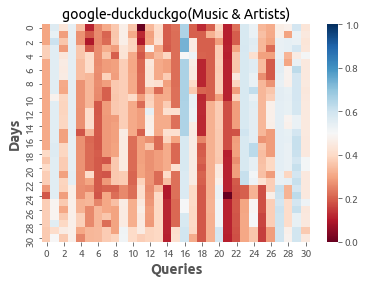

In [29]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Music & Artists', 'T', '2016')

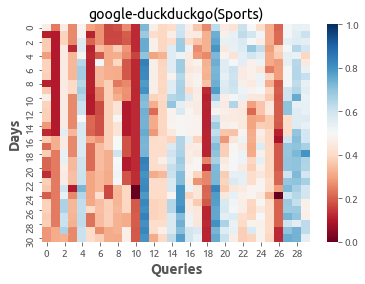

In [30]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Sports', 'T', '2016')

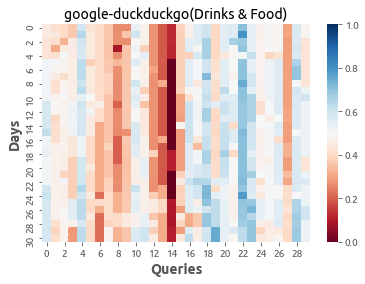

In [31]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Drinks & Food', 'T', '2016')

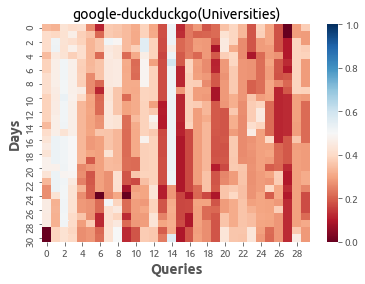

In [32]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Universities', 'T', '2016')

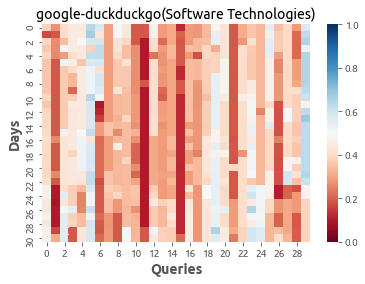

In [33]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Software Technologies', 'T', '2016')

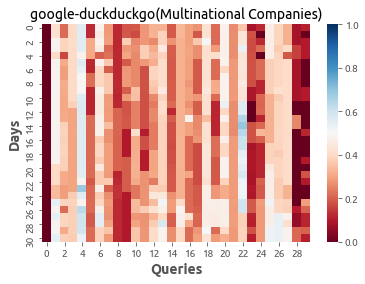

In [34]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Multinational Companies', 'T', '2016')

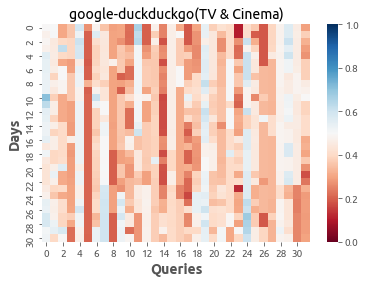

In [35]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'TV & Cinema', 'T', '2016')

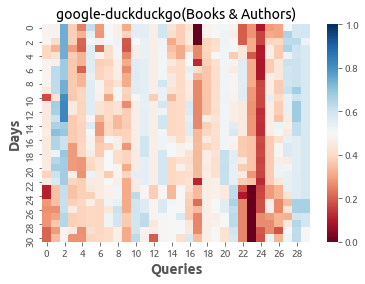

In [36]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Books & Authors', 'T', '2016')

## Analyzing the Results collected in 2019


### Bing-Duckduckgo

In [37]:
results_dir = os.path.realpath('../web-results/results2019')

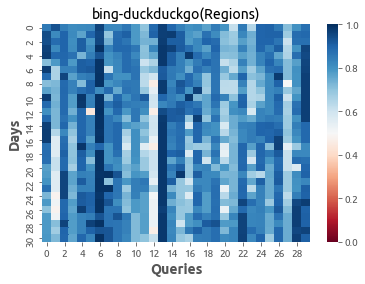

In [38]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Regions', 'T', '2019')

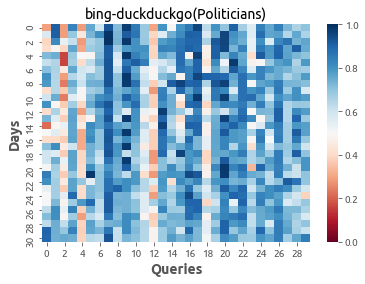

In [39]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Politicians', 'T', '2019')

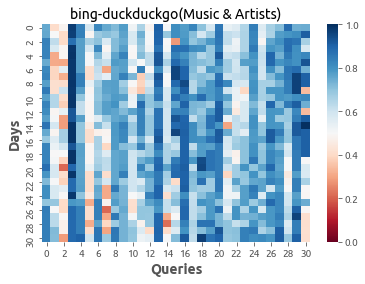

In [40]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Music & Artists', 'T', '2019')

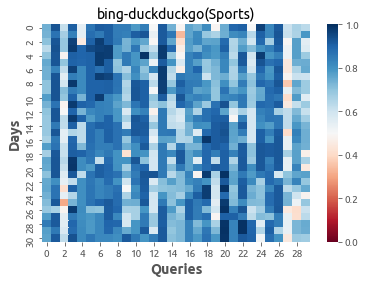

In [41]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Sports', 'T', '2019')

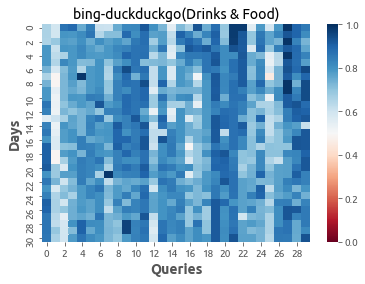

In [42]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Drinks & Food', 'T', '2019')

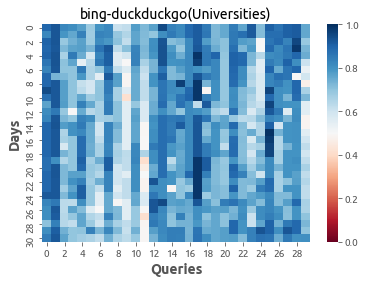

In [43]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Universities', 'T', '2019')

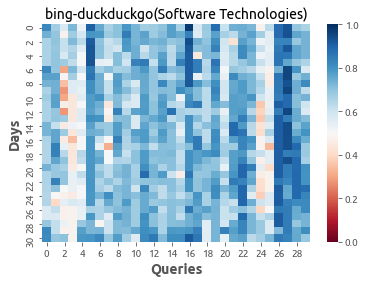

In [44]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Software Technologies', 'T', '2019')

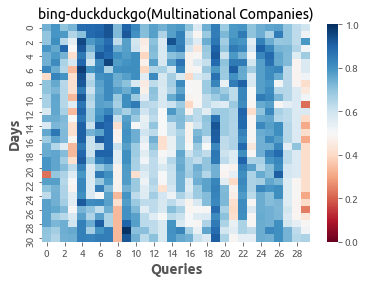

In [45]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Multinational Companies', 'T', '2019')

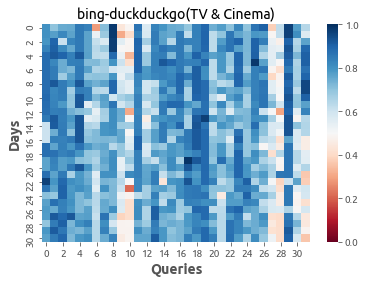

In [46]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'TV & Cinema', 'T', '2019')

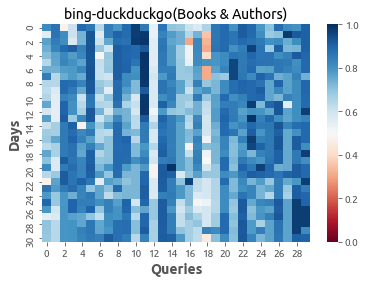

In [47]:
plot_similarity_heatmap(results_dir, 'bing', 'duckduckgo', 'Books & Authors', 'T', '2019')

### Bing-Google

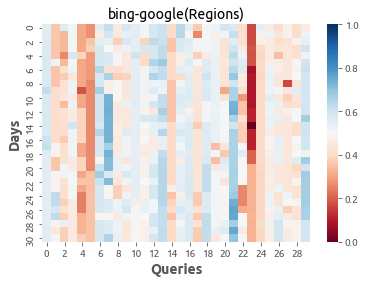

In [48]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Regions', 'T', '2019')

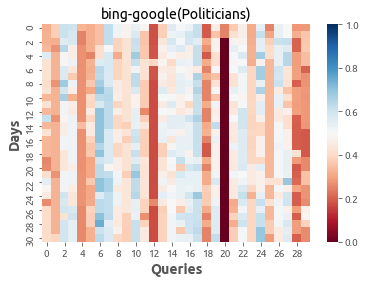

In [49]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Politicians', 'T', '2019')

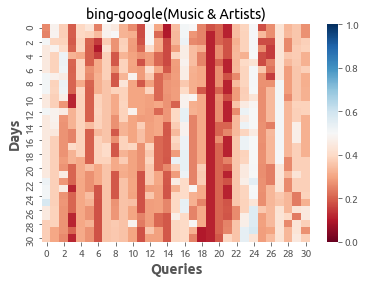

In [50]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Music & Artists', 'T', '2019')

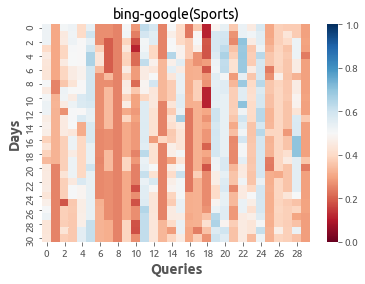

In [51]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Sports', 'T', '2019')

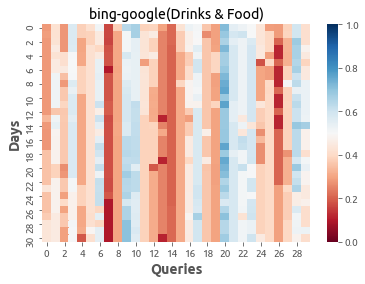

In [52]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Drinks & Food', 'T', '2019')

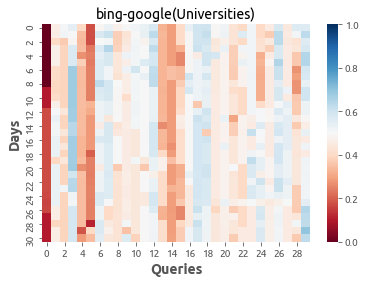

In [53]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Universities', 'T', '2019')

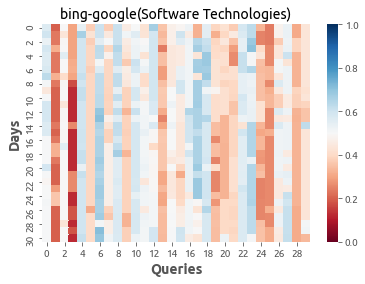

In [54]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Software Technologies', 'T', '2019')

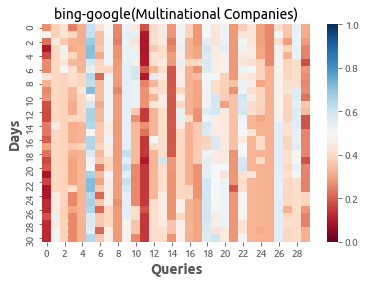

In [55]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Multinational Companies', 'T', '2019')

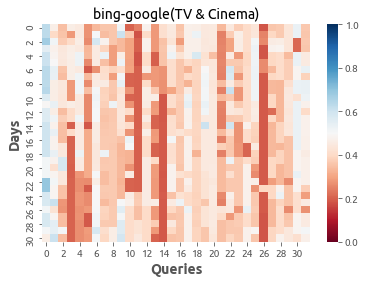

In [56]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'TV & Cinema', 'T', '2019')

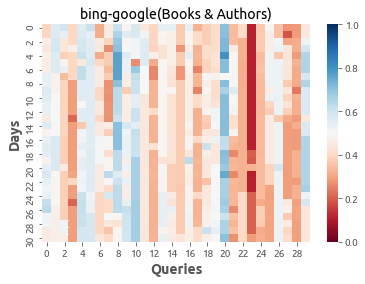

In [57]:
plot_similarity_heatmap(results_dir, 'bing', 'google', 'Books & Authors', 'T', '2019')

### Google-Duckduckgo

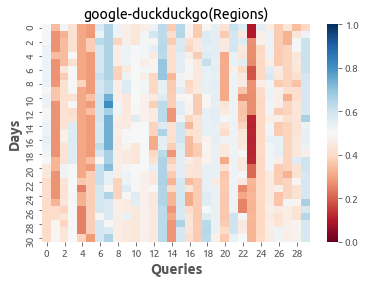

In [58]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Regions', 'T', '2019')

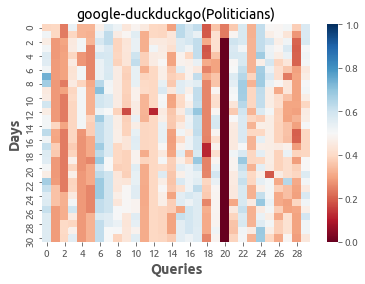

In [59]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Politicians', 'T', '2019')

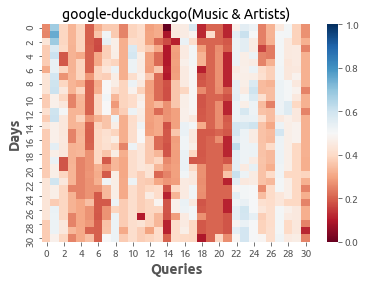

In [60]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Music & Artists', 'T', '2019')

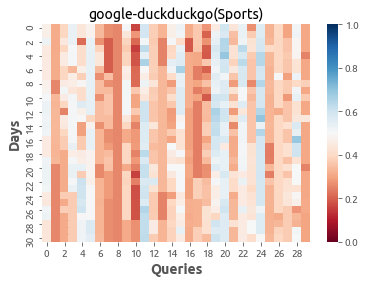

In [61]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Sports', 'T', '2019')

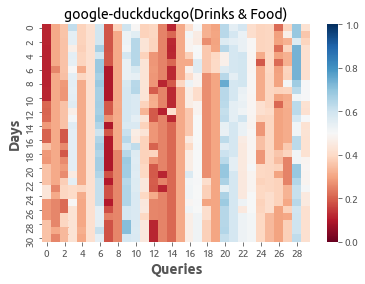

In [62]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Drinks & Food', 'T', '2019')

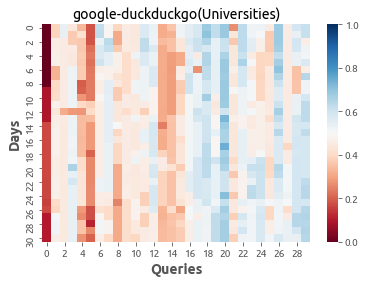

In [63]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Universities', 'T', '2019')

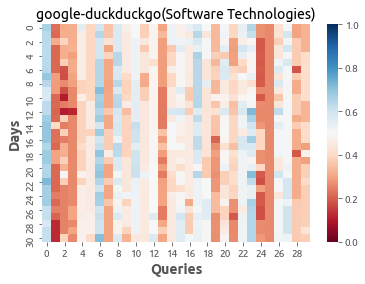

In [64]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Software Technologies', 'T', '2019')

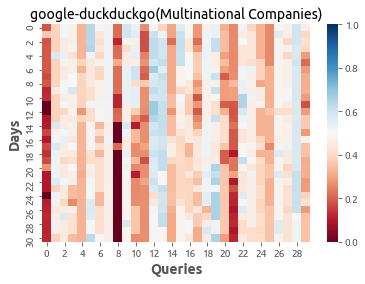

In [65]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Multinational Companies', 'T', '2019')

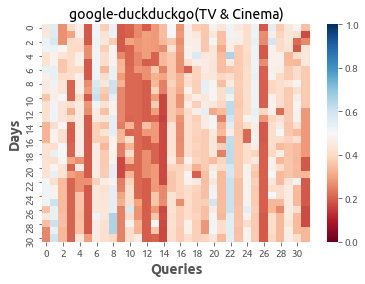

In [66]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'TV & Cinema', 'T', '2019')

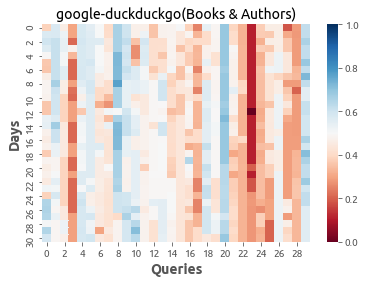

In [67]:
plot_similarity_heatmap(results_dir, 'google', 'duckduckgo', 'Books & Authors', 'T', '2019')

In [68]:
def construct_heatmap_dataframe(data):
    framedata = []
    for pair, array in data.items():
        for ix,iy in np.ndindex(array.shape):
            metric_t = array[ix, iy]
            framedata.append({
                'Pair': pair,
                'Day': ix,
                'Query': iy,
                'T': metric_t
            })
    return pd.DataFrame(framedata)

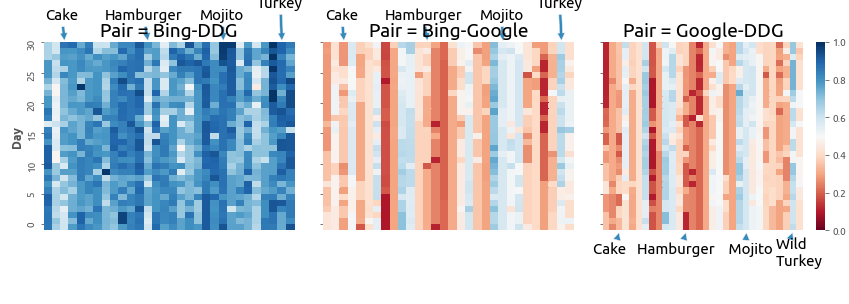

In [69]:
import time

def merge_heatmaps(query_category):
    data = {
        'Bing-DDG': load_data('bing', 'duckduckgo', query_category, 'T', '2019')[:,:,0],
        'Bing-Google': load_data('bing', 'google', query_category, 'T', '2019')[:,:,0],
        'Google-DDG': load_data('google', 'duckduckgo', query_category, 'T', '2019')[:,:,0],
    }
    dataframe = construct_heatmap_dataframe(data)
    
    def draw_heatmap(*args, **kwargs):
        data = kwargs.pop('data')
        d = data.pivot(index=args[1], columns=args[0], values=args[2])
        counter = kwargs.pop('counter')
        if counter['val'] != 2:
            kwargs['cbar'] = False
        counter['val'] += 1
        ax = sns.heatmap(d,**kwargs)
        plt.yticks([0,5,10,15,20,25,30], ['30','25','20','15','10','5','0'])  
        ax.xaxis.set_major_formatter(plt.NullFormatter())
        g.axes[0,counter['val']-1].xaxis.set_visible(False)

        
        if counter['val'] !=3:
            plt.annotate('Cake', fontsize=15, xy=(2.5, 0.06), xytext=(0.2, -3.7), arrowprops=dict(arrowstyle="simple")) #3
            plt.annotate('Hamburger', fontsize=15, xy=(12.5, 0.06), xytext=(7.3, -3.7), arrowprops=dict(arrowstyle="simple")) #13
            plt.annotate('Mojito', fontsize=15, xy=( 21.5, 0.06), xytext=(18.7, -3.7), arrowprops=dict(arrowstyle="simple")) #22
            plt.annotate('Wild\nTurkey', fontsize=15, xy=(28.5, 0.06), xytext=(25.5, -5.7), arrowprops=dict(arrowstyle="simple")) #29
            

        else:
            plt.annotate('Cake   ', fontsize=15, xy=(2.5, 31.05), xytext=(-1.5, 34.8), arrowprops=dict(arrowstyle="simple"))
            plt.annotate('Hamburger   ', fontsize=15, xy=(12.5, 31.05), xytext=(5.1, 34.8), arrowprops=dict(arrowstyle="simple")) #13
            plt.annotate('   Mojito', fontsize=15, xy=(21.5, 31.05), xytext=(17.2, 34.8), arrowprops=dict(arrowstyle="simple")) #22
            plt.annotate('        Wild\n        Turkey', fontsize=15, xy=(28.5, 31.05), xytext=(21.7, 36.8), arrowprops=dict(arrowstyle="simple")) #29

    counter = {'val': 0}
    g = sns.FacetGrid(dataframe, col="Pair", height=5, aspect=0.8)
    plt.rcParams['axes.labelsize'] = 19
    g.map_dataframe(draw_heatmap, 'Query', 'Day', 'T', vmin=0, vmax=1, cmap='RdBu', counter=counter)
    g.savefig("heatmap.pdf", format='pdf')
#     plt.ylabel('Day', fontsize='14')

merge_heatmaps('Drinks & Food')

# RQ2: The evolution of the similarity over time

In [70]:
import pandas as pd
import seaborn as sns

def compute_similarity_all_categories_and_pairs(results_dir, metric, time, N=10):
    data_se = None
    for sA, sB in itertools.combinations(SEARCH_ENGINES, 2):
        sim = None
        for query_category in CATEGORIES:
            sim_tmp = compute_similarity(sA, sB, results_dir, query_category, metric, time, N=10)
            
            if sim is None:
                sim = sim_tmp
            else:
                sim = np.concatenate((sim, sim_tmp), axis=1)
        avg_sim = np.average(sim, axis=(1, 2))
        if data_se is None:
            data_se = avg_sim.reshape(avg_sim.shape[0], 1)
        else:
            data_se = np.append(data_se, avg_sim.reshape(avg_sim.shape[0], 1), axis=1)
    return data_se



def plot_consistency_plot(data):
    plt.rcParams['figure.figsize'] = (10, 9.8)
    plt.rcParams['axes.labelsize'] = 19
    plt.xlim([0, 32])
    plt.ylim([0, 1])
#     plt.title(' ', fontsize=1)
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
    plt.ylabel('Similarity', fontsize='24')
    plt.xlabel('Day', fontsize='24')
    ax.xaxis.labelpad = 12
    plt.xlim([0, 30.4])
    plt.xticks([i for i in range(4,32,5)],[i for i in range(5,31,5)])

    sns.lineplot(hue="coherence", style="choice",
                 markers=True, dashes=False, data=data,
                 linewidth=1, markersize=8, alpha=1,
                 palette=sns.color_palette("muted", n_colors=3))
#     plt.setp(ax.get_legend().get_texts(), fontsize='24')
    lgnd = plt.legend(fontsize=24)
    
    #change the marker size manually for all lines
    lgnd.legendHandles[0]._legmarker.set_markersize(8)
    lgnd.legendHandles[1]._legmarker.set_markersize(8)
    lgnd.legendHandles[2]._legmarker.set_markersize(8)

In [71]:
sns.set(style="whitegrid")
results_dir = os.path.realpath('../web-results/results2019')


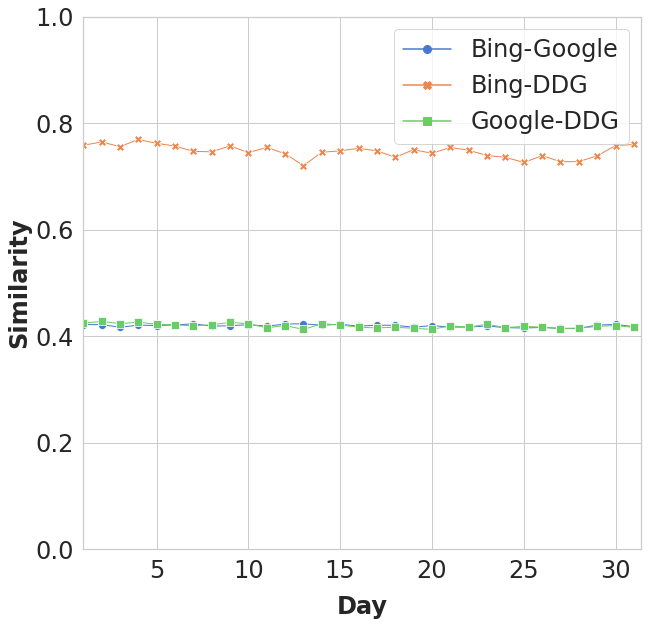

In [72]:
sim_data = compute_similarity_all_categories_and_pairs(results_dir, 'T', '2019')
dataframe = pd.DataFrame(sim_data, columns=['Bing-Google', 'Bing-DDG', 'Google-DDG'])
plot_consistency_plot(dataframe)
plt.savefig("consistency_plot.pdf", format='pdf', bbox_inches='tight',pad_inches=0)

In [73]:
avg_sim = np.average(sim_data, axis=0)
print(avg_sim)

[0.41944662 0.74702436 0.4193847 ]


In [74]:
from collections import defaultdict


def compute_similarity_all_categories_and_pairs(N=10):
    framedata = []
    data = defaultdict(list)
    for time in ['2016', '2019']:
        if time == '2016':
            results_dir = os.path.realpath('../web-results/results')
        else:
            results_dir = os.path.realpath('../web-results/results2019')
        for sA, sB in itertools.combinations(SEARCH_ENGINES, 2):
            pair = SEARCH_ENGINE_READABLE_NAMES[sA] + '-' + SEARCH_ENGINE_READABLE_NAMES[sB]
            for query_category in CATEGORIES:
                print(sA, sB, time)
                sim = compute_similarity(sA, sB, results_dir, query_category, 'T', time, N=N)
                avg_sim = np.average(sim, axis=(0, 1))
                data[(sA, sB, time)].append(avg_sim)
                framedata.append({
                    'time': time,
                    'Pair': SEARCH_ENGINE_READABLE_NAMES[sA] + '-' + SEARCH_ENGINE_READABLE_NAMES[sB],
                    'Similarity': avg_sim,
                    'Query Category': query_category
                })
            
    def compute_percentage(initial, final):
        initial = sum(initial) / len(initial)
        final = sum(final) / len(final)
        return ((final - initial) / final) * 100
    
    avg1 = data[('bing', 'duckduckgo', '2016')]
    avg2 = data[('bing', 'duckduckgo', '2019')]
    print (compute_percentage(avg1, avg2))
    
    avg1 = data[('bing', 'google', '2016')]
    avg2 = data[('bing', 'google', '2019')]
    print (compute_percentage(avg1, avg2))
    
    avg1 = data[('google', 'duckduckgo', '2016')]
    avg2 = data[('google', 'duckduckgo', '2019')]
    print (compute_percentage(avg1, avg2))
    return pd.DataFrame(framedata)

In [75]:
df = compute_similarity_all_categories_and_pairs()

bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
google duc

In [76]:
df = compute_similarity_all_categories_and_pairs()

df_updated = df[['Pair', 'Query Category']].copy()
df_updated.drop_duplicates(keep='first',inplace=True) 

# Split df in two subdfs based on the year of results
g = df.groupby('time')
df2016 = g.get_group((list(g.groups)[0]))
df2016 = df2016.drop('time',1)
df2016.rename(columns={'Similarity': 'Sim2016'}, inplace=True)
df2019 = g.get_group((list(g.groups)[1]))
df2019 = df2019.drop('time',1)
df2019.rename(columns={'Similarity': 'Sim2019'}, inplace=True)

# Merge subdfs based in Pair and Query Category
dfinal = df2016.merge(df2019, on=['Pair','Query Category'])
print(dfinal)

bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing google 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
bing duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
google duckduckgo 2016
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing google 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
bing duckduckgo 2019
google duc

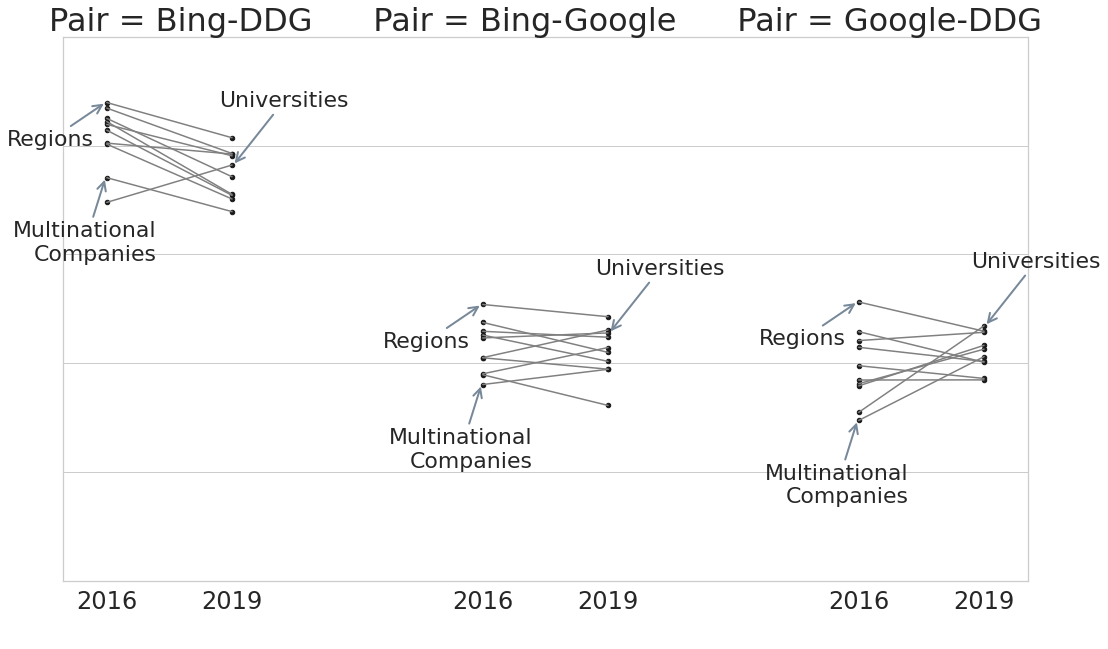

In [77]:
import random
from matplotlib.ticker import NullFormatter

fig, ax = plt.subplots(figsize=(17.3, 10))

# Set up list to track sites
pairs = []
i = 1.7
c = 0
# ax.set_ylim([0, 1])

left_categories = ['Regions', 'Multinational Companies']
right_categories = ['Universities']
xtickslist=[]
for pair, subdfpairs in dfinal.groupby(['Pair']):
    pairs.append(pair)
    
    for index, row in subdfpairs.iterrows():
        c+=1
        sim2016 = row['Sim2016']
        sim2019 = row['Sim2019']
        cat = row['Query Category']

        # Set up the x-axis values kai klish grammwn
        x1 = i - 0.1
        x2 = i

        if cat in right_categories:
            
            ax.annotate(cat,xy=((x2+0.001),sim2019), xytext=((x2-0.01),(sim2019+0.1)),# fontweight="bold",
                        horizontalalignment='left', verticalalignment='bottom', size=22,
                        arrowprops=dict(arrowstyle="->", color='lightslategray', lw=2))
        
        elif cat in left_categories:
            
            if cat=='Multinational Companies':
                cat='Multinational\nCompanies'
                
                ax.annotate(cat,xy=((x1-0.001),sim2016), xytext=((x1+0.04),(sim2016-0.08)),# fontweight="bold",
                horizontalalignment='right', verticalalignment='top', size=22,
                arrowprops=dict(arrowstyle="->", color='lightslategray', lw=2))

            else:
                ax.annotate(cat,xy=((x1-0.001),sim2016), xytext=((x1-0.01),(sim2016-0.05)),# fontweight="bold",
                horizontalalignment='right', verticalalignment='top', size=22,
                arrowprops=dict(arrowstyle="->", color='lightslategray', lw=2))

        ax.plot([x1, x2], [sim2016, sim2019], c='gray')
        
        # Plot the points
        ax.scatter((x1-0.0001), sim2016, c='k',
                   s=20, label='2016')
        ax.scatter((x2+0.0001), sim2019, c='k',
                   s=20, label='2019')

    xtickslist.extend([x1,x2])

    # Update x-axis
    i += 0.3

ax.set_xticks(xtickslist)
ax.set_xticklabels(["2016\n", "2019\n","2016\n", "2019\n","2016\n", "2019\n"], fontsize=24)
axes = plt.gca().set_ylim([0,1])
#Remove yticks
plt.gca().yaxis.set_major_formatter(NullFormatter())

#Remove vertical grid lines
plt.gca().xaxis.grid(False)

plt.gca().set_title('Pair = Bing-DDG      Pair = Bing-Google      Pair = Google-DDG', size=32)

plt.savefig("time_plot.pdf", format='pdf', bbox_inches='tight',pad_inches=0)

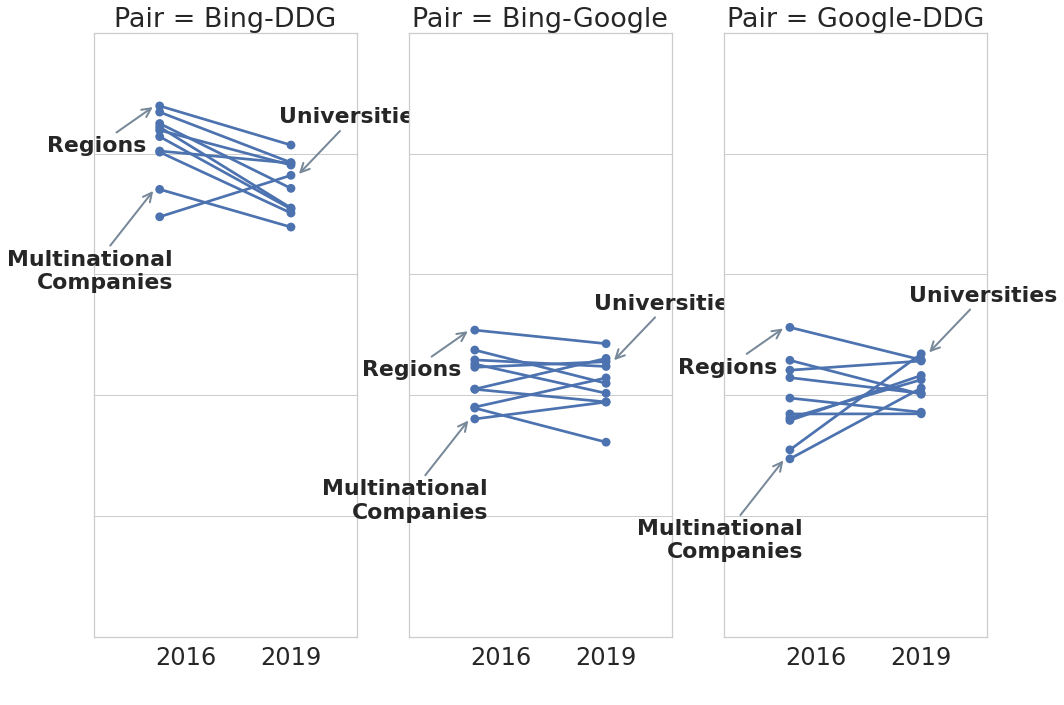

In [78]:
import random
import seaborn as sns
from matplotlib.ticker import NullFormatter

sns.set(style="whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 11.1))

# ax1.set_ylim([0.63, 0.93])
ax1.set_xlim([0.86,1.02])
ax1.set_title('Pair = Bing-DDG', size=27)

# ax2.set_ylim([0.3, 0.6])
ax2.set_xlim([0.86,1.02])
ax2.set_title('Pair = Bing-Google', size=27)

# ax3.set_ylim([0.3, 0.6])
ax3.set_xlim([0.86,1.02])
ax3.set_title('Pair = Google-DDG', size=27)

pairs = []
i = 1
axes_list = [ax1, ax2, ax3]
ax_counter = 0
left_categories = ['Regions', 'Multinational Companies']
right_categories = ['Universities']

for pair, subdfpairs in dfinal.groupby(['Pair']):

    pairs.append(pair)
    ax = axes_list[ax_counter]

    for index, row in subdfpairs.iterrows():
        c+=1
        sim2016 = row['Sim2016']
        sim2019 = row['Sim2019']
        cat = row['Query Category']

        # Set up the x-axis values kai klish grammwn
        x1 = i - 0.8
        x2 = i
        
#         plt.yticks(fontsize=20)
#         ax.set_yticks([])

        #hide yticks but keep gridlines
        ax.axes.get_yaxis().set_major_formatter(NullFormatter())


        if cat in right_categories:
            
            ax.annotate(cat,xy=((x2+0.05),sim2019), xytext=((x2-0.09),(sim2019+0.08)), fontweight="bold",
                        horizontalalignment='left', verticalalignment='bottom', size=22,
                        arrowprops=dict(arrowstyle="->", color='lightslategray', lw=2))
        
        elif cat in left_categories:
            
            if cat=='Multinational Companies':
                cat='Multinational\nCompanies'
                
                ax.annotate(cat,xy=((x1-0.24),sim2016), xytext=((x1-0.1),(sim2016-0.1)), fontweight="bold",
                horizontalalignment='right', verticalalignment='top', size=22,
                arrowprops=dict(arrowstyle="->", color='lightslategray', lw=2))

            else:
                ax.annotate(cat,xy=((x1-0.24),sim2016), xytext=((x1-0.3),(sim2016-0.05)), fontweight="bold",
                horizontalalignment='right', verticalalignment='top', size=22,
                arrowprops=dict(arrowstyle="->", color='lightslategray', lw=2))

        ax = sns.pointplot(x=[x1, x2], y=[sim2016, sim2019], ax=ax)
        ax.set_ylim([0, 1])

#     #set size of ytick labels
#     ax.tick_params(axis='both', which='major', labelsize=22)
    
    ax_counter+=1
#     if ax_counter == 1:
#         ax.set_ylabel('Similarity', fontsize=38)
#     ax.set_xlabel('Time')
    
    ax.set_xticks([x1, x2])
    _ = ax.set_xticklabels(['2016\n', '2019\n'], fontsize=24)
#     ax.xaxis.labelpad = 30

# plt.savefig("../docs/figures/time_plot.pdf", format='pdf')
# plt.savefig("../docs/figures/time_plot.pdf", format='pdf', bbox_inches='tight',pad_inches=0)

# RQ3: The Impact of Snippets, Titles and Transpositions

In [79]:
def extract_path_weight(sA, sB, metric, weight, time='2019'):
    filename = '_'.join([sA, sB, 'all', metric, time, weight])
    return os.path.join('../data', filename)


def average_similarity_for_all_categories(results_dir, sA, sB,
                                          time, metric='T', N=10):
    zeros = np.zeros(11, dtype=np.float64)
    weights = np.linspace(0, 1, 11, endpoint=True, dtype=np.float64)
    all_weights = [ weights, zeros, zeros ]
    
    def _average_similarity_for_all_categories(weights_a, weights_b, weights_c, weight_type):
        sim = None
        for query_category in CATEGORIES:
            sim_ = compute_similarity(sA, sB, results_dir, query_category, 'T', time,
                                      N=N, a=weights_a,
                                      b=weights_b, c=weights_c, force=True)
            if sim is None:
                sim = sim_
            else:
                sim = np.concatenate((sim, sim_), axis=1)
        
        path = extract_path_weight(sA, sB, metric, weight_type, time)
        np.save(path, sim)
        return sim
        
    sims = tuple()
    
    for i, weight_type in enumerate(['a', 'b', 'c']):
        path = extract_path_weight(sA, sB, metric, weight_type, time) + '.npy'
        if os.path.exists(path):
            sim_weight = np.load(path)
        else:
            weights_a = all_weights[(-i) % 3]
            weights_b = all_weights[(1 - i) % 3]
            weights_c = all_weights[(2 - i) % 3]
            print (weights_a, weights_b, weights_c)
            sim_weight = _average_similarity_for_all_categories(weights_a, weights_b, weights_c, weight_type)
        sims += (sim_weight,)
    return sims

In [80]:
results_dir = os.path.realpath('../web-results/results2019')
sims_bd = average_similarity_for_all_categories(results_dir, 'bing', 'duckduckgo', '2019', N=10)
sims_bg = average_similarity_for_all_categories(results_dir, 'bing', 'google', '2019', N=10)
sims_gd = average_similarity_for_all_categories(results_dir, 'google', 'duckduckgo', '2019', N=10)

In [81]:
sns.set(style="whitegrid")

In [82]:
def compute_percentage(array):
    def _compute_percentage(initial, final):
        return ( - (final - initial) / float(initial)) * 100
    
    initial = array[0]
    percentages = []
    for final in array[0:]:
        percentages.append(_compute_percentage(initial, final))
    return np.asarray(percentages, dtype=np.float64)


def construct_array(sims):
    sims_a, sims_b, sims_c = sims
    print(type(sims_a))
    print(sims_a.shape)
    sims_a = compute_percentage(np.average(sims_a, axis=(0, 1)).reshape(11, 1))
    sims_b = compute_percentage(np.average(sims_b, axis=(0, 1)).reshape(11, 1))
    sims_c = compute_percentage(np.average(sims_c, axis=(0, 1)).reshape(11, 1))
    
    sim = sims_a
    sim = np.append(sim, sims_b, axis=1)
    return np.append(sim, sims_c, axis=1)


def plot_weights(data):
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.rcParams['axes.labelsize'] = 19
    plt.xlim([0, 11])
    plt.ylim([0, 40])
    plt.ylabel('Similarity Decrease (%)')
    plt.xticks([0, 2, 4, 6, 8, 10], [0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel('Weight')
    data = pd.DataFrame(construct_array(data), columns=['Snippets', 'Titles', 'Transpositions'])
    sns.lineplot(hue="coherence", style="choice",
                 markers=True, dashes=False, data=data,
                 linewidth=1, markersize=8)

    
def construct_dataframe(data):
    framedata = []
    for pair, array in data.items():
        for ix,iy in np.ndindex(array.shape):
            metric_t = array[ix, iy]
            if iy == 0:
                weight_type = 'Snippets'
            elif iy == 1:
                weight_type = 'Titles'
            else:
                weight_type = 'Transpositions'
            framedata.append({
                'Pair': pair,
                'X': weight_type,
                'Weight': ix / 10.0,
                'Decrease': metric_t})
    return pd.DataFrame(framedata)

<class 'numpy.ndarray'>
(31, 303, 11)


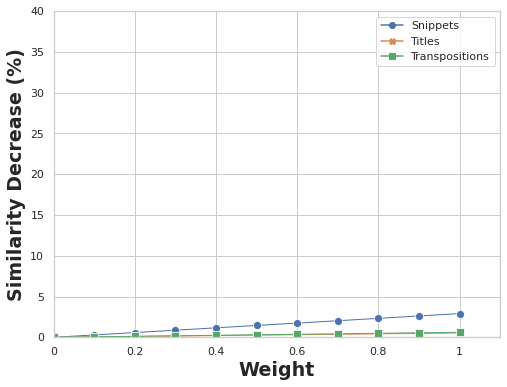

In [83]:
plot_weights(sims_bd)

<class 'numpy.ndarray'>
(31, 303, 11)


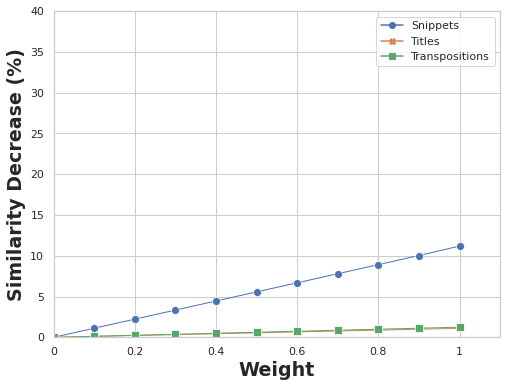

In [84]:
plot_weights(sims_bg)

<class 'numpy.ndarray'>
(31, 303, 11)


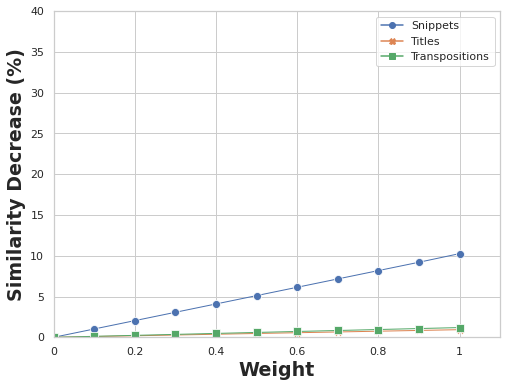

In [85]:
plot_weights(sims_gd)

In [86]:
def merge_plots(col, hue, col_order=None):
    data = {'Bing-DDG': construct_array(sims_bd),
            'Bing-Google': construct_array(sims_bg),
            'Google-DDG': construct_array(sims_gd)
           }
    data = construct_dataframe(data)
    g = sns.FacetGrid(data, col=col, col_order=col_order, hue=hue, height=6,
                      aspect=0.8, hue_kws={'marker': ['D', 's', 'o']})
    plt.rcParams['axes.labelsize'] = 27
    g.map(sns.lineplot, "Weight", "Decrease", markers=True,
          linewidth=1, markersize=8, label='fdoo')
    g.add_legend(title='')
    g.set_axis_labels('Weight', 'Similarity Decrease(%)')
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['axes.labelsize'] = 20
    plt.yticks([5,10,15,20], ['5','10','15','20'])  
    plt.ylim([0, 20])
    plt.xlim([0, 1.05])
    g._legend.remove()
    plt.legend(frameon=False, bbox_to_anchor=(1, 0.7), prop={'size': 20})

<class 'numpy.ndarray'>
(31, 303, 11)
<class 'numpy.ndarray'>
(31, 303, 11)
<class 'numpy.ndarray'>
(31, 303, 11)


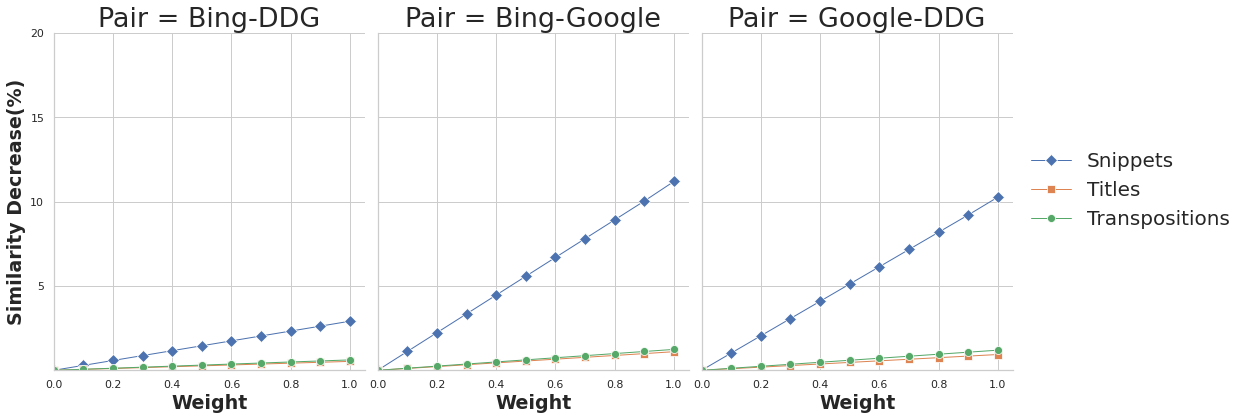

In [87]:
merge_plots('Pair', 'X')
plt.savefig('impact_fig.pdf', format='pdf', bbox_inches='tight')

<class 'numpy.ndarray'>
(31, 303, 11)
<class 'numpy.ndarray'>
(31, 303, 11)
<class 'numpy.ndarray'>
(31, 303, 11)


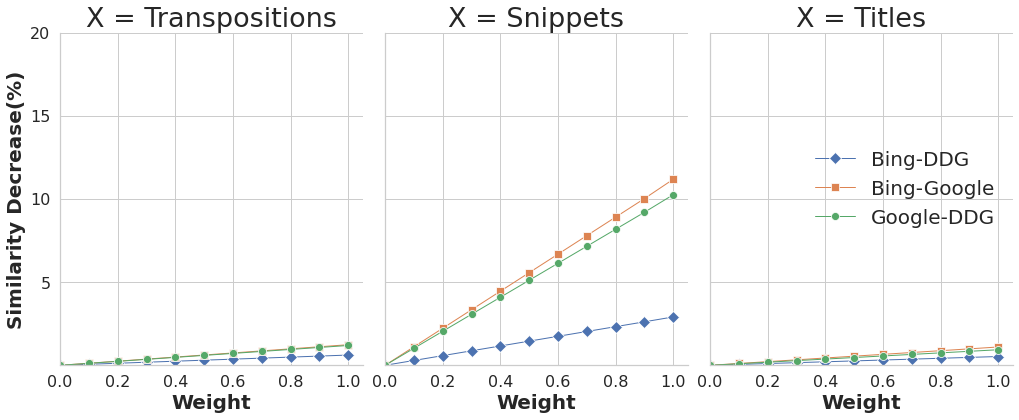

In [88]:
merge_plots('X', 'Pair', col_order=['Transpositions', 'Snippets', 'Titles'])

# RQ5: Comparison With Existing Approaches

## Content-Based Approaches

### TensorCompare

In [89]:
from seanalysis.models.tensor import TensorCompare
from seanalysis.algorithms.bag_of_words import BagOfWords


results_dir = os.path.realpath('../web-results/results2019')


def load_snippets(results_dir, sA, sB, query_category, N=10, per_day=True):
    return utils.load_snippets(results_dir, query_category, [sA, sB], N=N, per_day=per_day)


def _tensor_compare(results_dir, sA, sB, query_category, N=10, per_day=True,
                    components=20, vocabulary=100):
    snippets = load_snippets(results_dir, sA, sB, query_category, N=N, per_day=per_day)
    bow = BagOfWords(snippets)
    bow_obj = bow.build_bows(vocabulary)
    tensor = TensorCompare(bow_obj, bow.get_queries(), components)
    tensor.construct()
    tensor.evaluate()
    save_data(tensor.se_dist, sA, sB, query_category, 'tensor', '2019')
    return tensor.se_dist


def tensor_compare(results_dir, sA, sB, query_category, N=10, per_day=True,
                   components=20, vocabulary=100):
    path = extract_path(sA, sB, query_category, 'tensor', '2019')
    if os.path.exists(path + '.npy'):
        return load_data(sA, sB, query_category, 'tensor', '2019')
    else:
        return _tensor_compare(results_dir, sA, sB, query_category, N=N, per_day=per_day,
                               components=components, vocabulary=vocabulary)

In [90]:
from collections import defaultdict

tensor_data = {}
for sA, sB in itertools.combinations(SEARCH_ENGINES, 2):
    for query_category in CATEGORIES:
        tensor = tensor_compare(results_dir, sA, sB, query_category)
        tensor_data[(sA, sB, query_category)] = tensor
    
    
def construct_dataframe(data):
    framedata = defaultdict(list)
    for (sA, sB, query_category), tensor in data.items():
        pair = SEARCH_ENGINE_READABLE_NAMES[sA] + '-' + SEARCH_ENGINE_READABLE_NAMES[sB]
        framedata[query_category].extend([
            {
                'Pair': pair,
                'X': tensor[0][i],
                'Y': tensor[1][i],
            }
            for i in range(20)
        ])
    return {
        query_category: pd.DataFrame(val)
        for query_category, val in framedata.items()
    }
        

def plot_tensor_diagram(query_category, data):
    dataframe = data[query_category]
    g = sns.FacetGrid(dataframe, col="Pair", height=5, aspect=0.8,
                      col_order=['Bing-DDG', 'Bing-Google', 'Google-DDG'])
    plt.ylim([0, 1.1])
    plt.xlim([0, 1.1])
    g.map(sns.scatterplot, 'X', 'Y', alpha=0.5, sizes=(130, 200), size=100)

data = construct_dataframe(tensor_data)

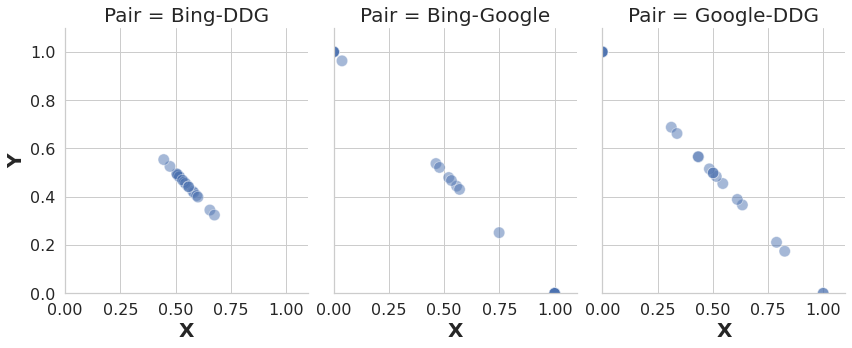

In [91]:
plot_tensor_diagram('Regions', data)

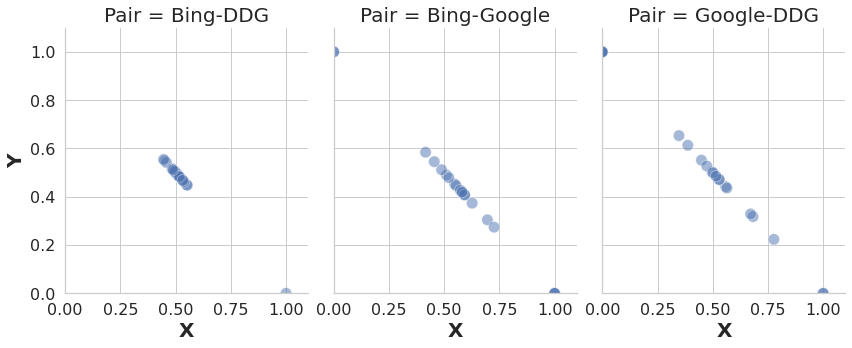

In [92]:
plot_tensor_diagram('Politicians', data)

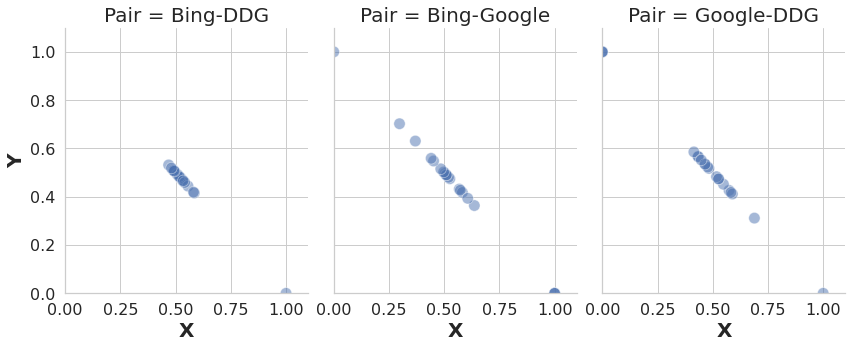

In [93]:
plot_tensor_diagram('Music & Artists', data)

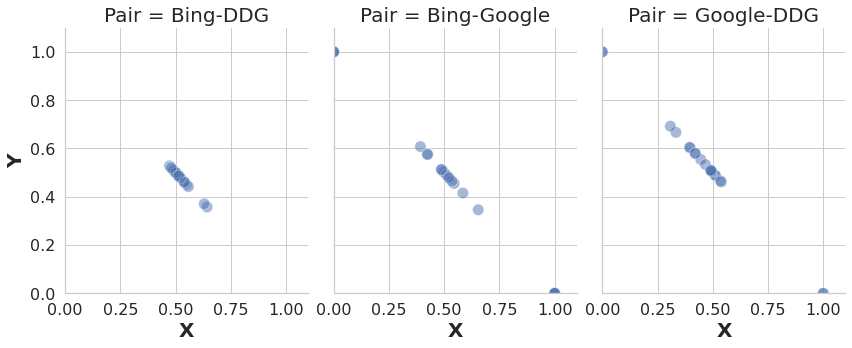

In [94]:
plot_tensor_diagram('Sports', data)

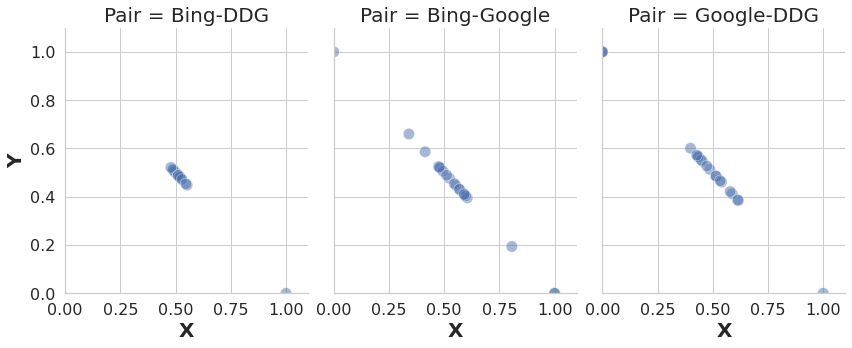

In [95]:
plot_tensor_diagram('Drinks & Food', data)

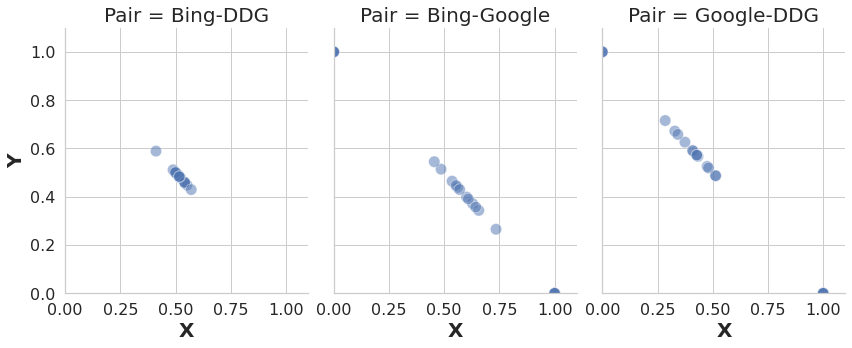

In [96]:
plot_tensor_diagram('Universities', data)

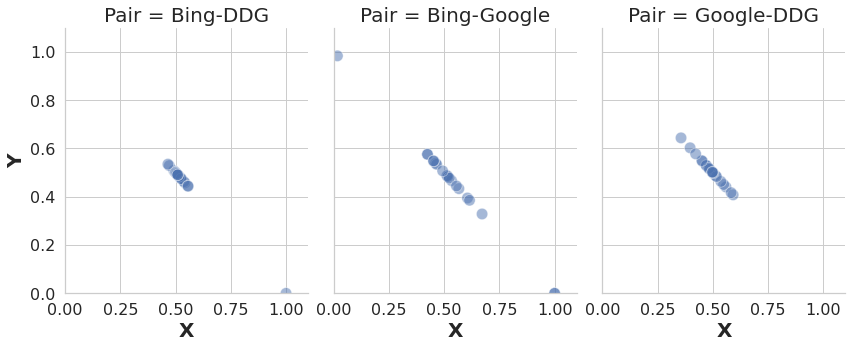

In [97]:
plot_tensor_diagram('Multinational Companies', data)

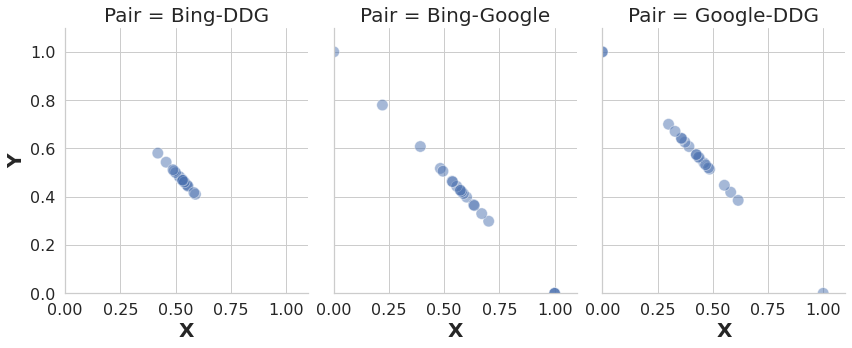

In [98]:
plot_tensor_diagram('Software Technologies', data)

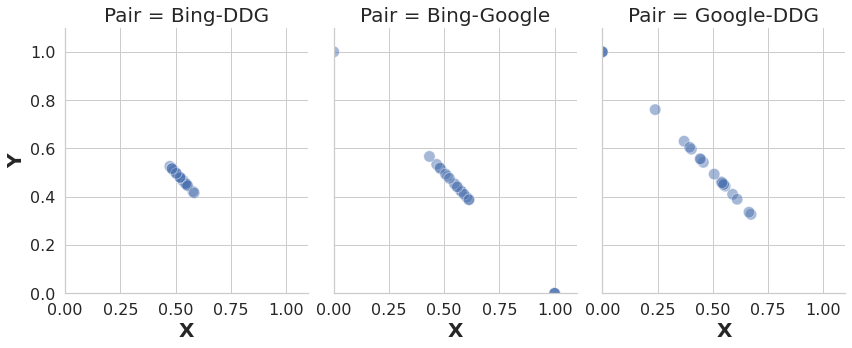

In [99]:
plot_tensor_diagram('TV & Cinema', data)

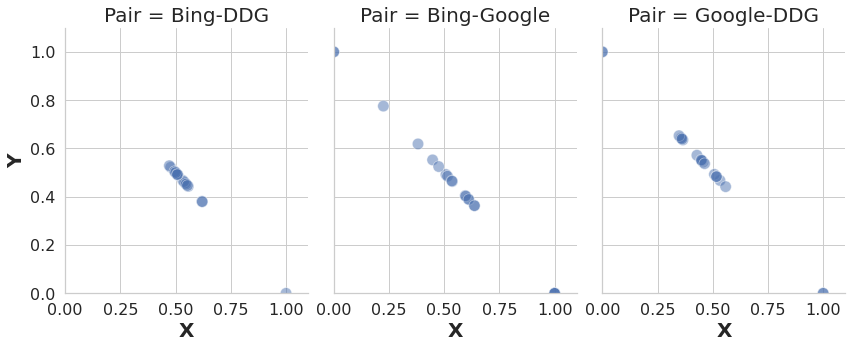

In [100]:
plot_tensor_diagram('Books & Authors', data)

### CrossLearnCompare

In [101]:
import pickle
from seanalysis.models.query_clf import QueryClassificationModel


def save_dict(data_dict, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data_dict, f, pickle.HIGHEST_PROTOCOL)

        
def load_dict(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
        

def cross_learn_compare(results_dir, query_category, N=10, per_day=True,
                        vocabulary=100):
    path = '../data/cross_learn_compare_' + query_category
    
    if os.path.exists(path):
        return load_dict(path)
    else:
        snippets = utils.load_snippets(
            results_dir, query_category, ['bing', 'duckduckgo', 'google'], N=N,
            per_day=per_day)
        bow = BagOfWords(snippets)
        bow_obj = bow.build_bows(vocabulary)
        query_se = QueryClassificationModel(bow_obj, bow.get_queries(), evaluation='clc')
        query_se.construct()
        query_se.evaluate()
        save_dict(query_se.results, path)
        return query_se.results

In [102]:
clc_data = {}
for query_category in CATEGORIES:
    preds = cross_learn_compare(results_dir, query_category)
    clc_data[query_category] = preds

In [103]:
from sklearn.metrics import auc, roc_curve

In [104]:
def plot_roc_curve(query_category, data):
    category_results = data[query_category]
    roc_metrics = [result.metrics for result in category_results]
    labels = [
        result.labels.replace('bing', 'Bing').replace(
            'duckduckgo', 'DDG').replace('google', 'Google')
        for result in category_results
    ]
    
    for i, (fpr, tpr, auc) in enumerate(roc_metrics):
        plt.plot(fpr, tpr, label='{0} (area = {1:0.2f})'.format(labels[i], auc), linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(
        'Receiver Operating Characteristic curve (%s)' % (query_category), fontsize=14)
    plt.legend(loc="lower right")

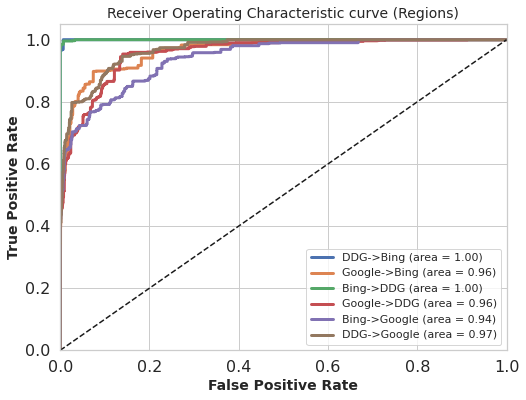

In [105]:
plot_roc_curve('Regions', clc_data)

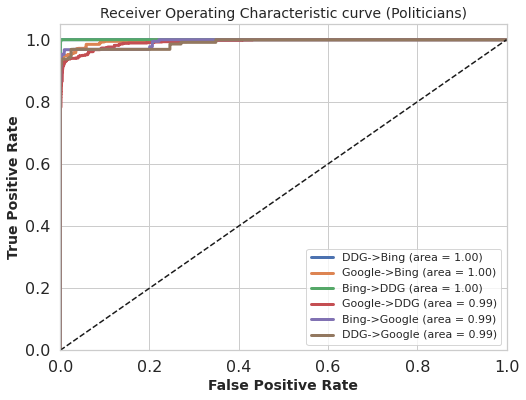

In [106]:
plot_roc_curve('Politicians', clc_data)

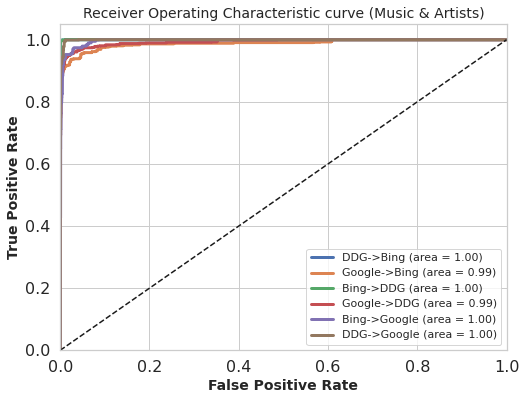

In [107]:
plot_roc_curve('Music & Artists', clc_data)

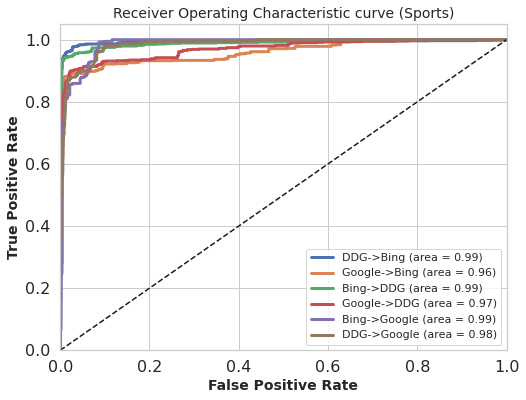

In [108]:
plot_roc_curve('Sports', clc_data)

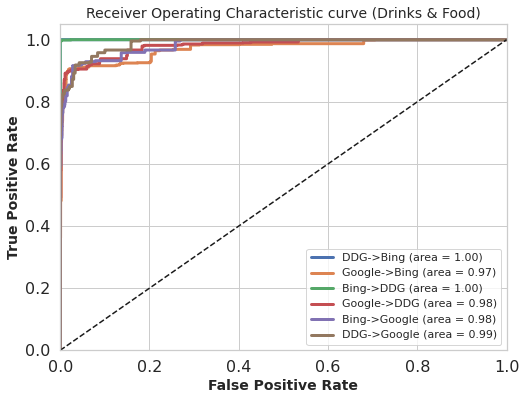

In [109]:
plot_roc_curve('Drinks & Food', clc_data)

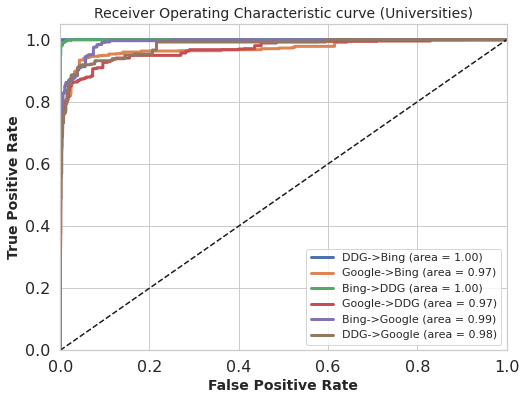

In [110]:
plot_roc_curve('Universities', clc_data)

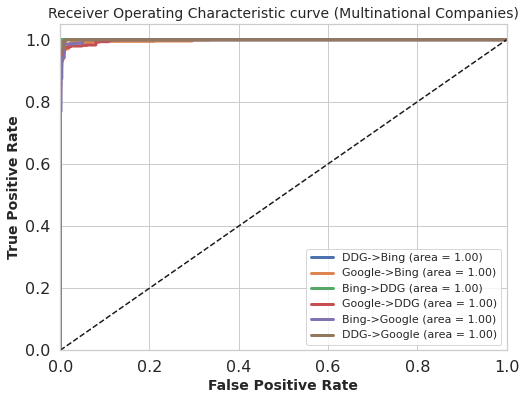

In [111]:
plot_roc_curve('Multinational Companies', clc_data)

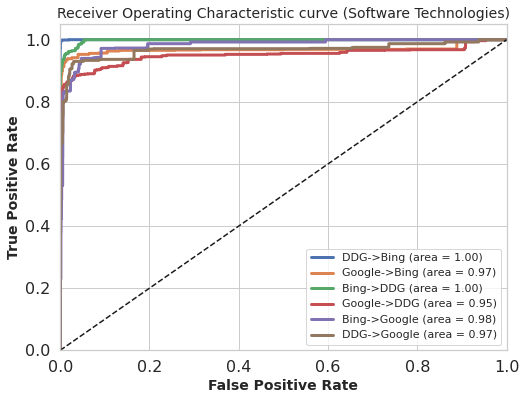

In [112]:
plot_roc_curve('Software Technologies', clc_data)

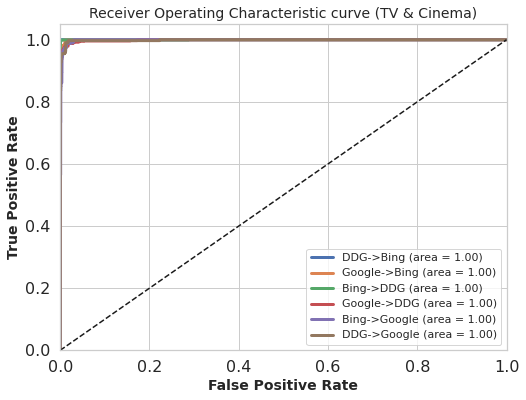

In [113]:
plot_roc_curve('TV & Cinema', clc_data)

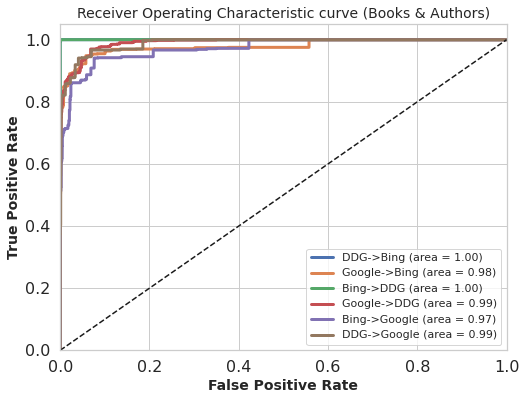

In [114]:
plot_roc_curve('Books & Authors', clc_data)

## Rankings-Based Approaches

In [115]:
results_dir = os.path.realpath('../web-results/results2019')


def similarity_for_all_categories(sA, sB, results_dir, metric, N=10, time='2019',
                                  weights_a=[0.8], weights_b=[1.0],
                                  weights_c=[0.8]):
    sim = None
    for query_category in CATEGORIES:
        sim_ = compute_similarity(sA, sB, results_dir, query_category,
                                  N=N, metric=metric, time=time)
        if sim is None:
            sim = sim_
        else:
            sim = np.concatenate((sim, sim_), axis=1)
    return sim
        

metrics = [
    'T',
    'M',
    'G',
    'JAR-WIN',
]
metric_data = {}
for m in metrics:
    for sA, sB in itertools.combinations(SEARCH_ENGINES, 2):
        metric_data[(sA, sB, m)] = similarity_for_all_categories(
            sA, sB, results_dir, m, N=10)

In [116]:
from collections import defaultdict
import scipy
sns.set(style="whitegrid")


def construct_dataframe(metric_data):
    framedata = []
    data = defaultdict(list)
    for (sA, sB, m), sim in metric_data.items():
        pair = SEARCH_ENGINE_READABLE_NAMES[sA] + '-' + SEARCH_ENGINE_READABLE_NAMES[sB]
        sim = sim[:,:,0]
        for ix,iy in np.ndindex(sim.shape):
            metric_value = sim[ix,iy]
            framedata.append({
                'Pair': pair,
                'Similarity': metric_value,
                'Metric': m,
            })
    for (sA, sB), metrics in data.items():
        for (m1, arr1), (m2, arr2) in itertools.combinations(metrics, 2):
            print(sA, sB, m1, m2, scipy.stats.wilcoxon(arr1, arr2))
    return pd.DataFrame(framedata)


def plot_boxplot(dataframe):
    plt.rcParams['axes.titlesize'] = 39
    g = sns.FacetGrid(dataframe, col="Pair", height=5, aspect=0.8,
                  col_order=['Bing-DDG', 'Bing-Google', 'Google-DDG'], hue_order=metrics)
    plt.rcParams['axes.labelsize'] = 19

    g.map_dataframe(sns.boxplot, 'Metric', 'Similarity', showfliers=False, showmeans=True, order=metrics, color='white',
          meanprops={"marker":"o"})
    plt.ylim([0, 1])

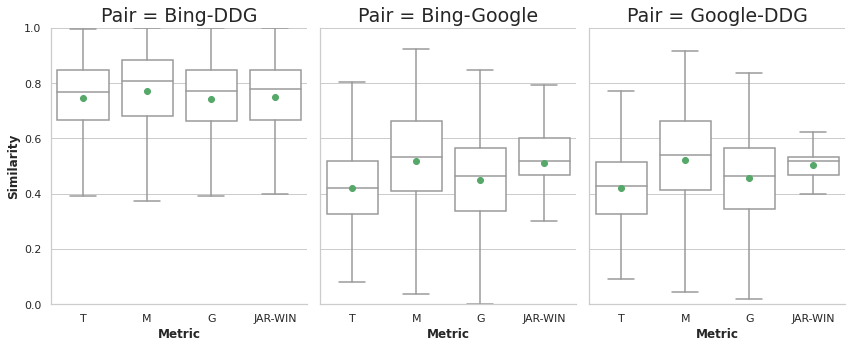

In [117]:
dataframe = construct_dataframe(metric_data)
plot_boxplot(dataframe)
plt.savefig('box_plot.pdf', format='pdf')

# RQ6: Nature of Queries

In [118]:
from seanalysis import utils
from seanalysis.compare_sorting import find_distance

import os

def extract_path(sA, sB, query_category, metric, time='2019'):
    filename = '_'.join([sA, sB, query_category, metric, time])
    return os.path.join('../data', filename)

SEARCH_ENGINES = [
    'bing',
    'google',
    'duckduckgo',
]

SEARCH_ENGINE_READABLE_NAMES = {
    'bing': 'Bing',
    'duckduckgo': 'DDG',
    'google': 'Google',
}

results_dir = os.path.realpath('../web-results/results2019')

def compute_metric_sim(sA, sB, results_dir, time, query_category,
                       N=10, metric='T', a=[0.8], b=[1], c=[0.0]):
    path = extract_path(sA, sB, query_category, metric, time)
    search_engines = [sA, sB]
    urls = utils.load_urls(results_dir, query_category, search_engines, N=N)
    snippets = utils.load_snippets(results_dir, query_category, search_engines,
                                   N=N, per_day=False)
    titles = utils.load_titles(results_dir, query_category, search_engines,
                               N=N, per_day=False)
    similarity = find_distance(None, urls, snippets, titles, search_engines,
                               query_category, metric, False, N, a, b, c)
    return similarity


In [119]:
import itertools
import os
import numpy as np
import pandas as pd
import seaborn as sns
from seanalysis import utils
from seanalysis.compare_sorting import find_distance
from seanalysis.drawing.visualization import Visualization

CATEGORIES = [
    'News'
]

def extract_path(sA, sB, query_category, metric, time='2019'):
    filename = '_'.join([sA, sB, query_category, metric, time])
    return os.path.join('../data', filename)

def save_data(obj, sA, sB, query_category, method='T', time='2019'):
    path = extract_path(sA, sB, query_category, method, time)
    np.save(path, obj)

    
def load_data(sA, sB, query_category, method='T', time='2019'):
    path = extract_path(sA, sB, query_category, method, time)
    return np.load(path + '.npy')

def compute_metric_sim(sA, sB, results_dir, time, query_category,
                       N=10, metric='T', a=[0.8], b=[1], c=[0.8]):
    path = extract_path(sA, sB, query_category, metric, time)
    search_engines = [sA, sB]
    urls = utils.load_urls(results_dir, query_category, search_engines, N=N)
    snippets = utils.load_snippets(results_dir, query_category, search_engines,
                                   N=N, per_day=False)
    titles = utils.load_titles(results_dir, query_category, search_engines,
                               N=N, per_day=False)
    similarity = find_distance(None, urls, snippets, titles, search_engines,
                               query_category, metric, False, 10, a, b, c)
    return similarity

def compute_similarity(sA, sB, results_dir, query_category, metric, time, N=10,
                       a=[0.0], b=[0.0], c=[0.0], force=False):
    path = extract_path(sA, sB, query_category, metric, time)
    if not force and os.path.exists(path + '.npy'):
        return load_data(sA, sB, query_category, metric, time)
    else:
        similarity = compute_metric_sim(sA, sB, results_dir, time,
                                        query_category, metric=metric, N=N,
                                        a=a, b=b, c=c)
        if not force:
            save_data(similarity, sA, sB, query_category, metric, time)
        return similarity


def compute_similarity_all_categories_and_pairs(results_dir, metric, time, N=10):
    data_se = None
    for sA, sB in itertools.combinations(SEARCH_ENGINES, 2):
        print(sA, sB)
        sim = None
        for query_category in CATEGORIES:
            sim_tmp = compute_similarity(sA, sB, results_dir, query_category, metric, time, N=N)
            
            if sim is None:
                sim = sim_tmp
            else:
                sim = np.concatenate((sim, sim_tmp), axis=1)
        print(sim.shape)
        avg_sim = np.average(sim, axis=(1, 2))
        if data_se is None:
            data_se = avg_sim.reshape(avg_sim.shape[0], 1)
        else:
            data_se = np.append(data_se, avg_sim.reshape(avg_sim.shape[0], 1), axis=1)
    return data_se

In [120]:
sim = compute_similarity_all_categories_and_pairs(results_dir, 'T', '2019', N=10)
avg_sim = np.average(sim, axis=0)
print(avg_sim)

bing google
(11, 30, 1)
bing duckduckgo
(11, 30, 1)
google duckduckgo
(11, 30, 1)
[0.15952102 0.03963148 0.03985142]


In [121]:
import matplotlib.pyplot as plt

def plot_consistency_plot(data):
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.rcParams['axes.labelsize'] = 19
    plt.xlim([0, 8])
    plt.ylim([0, 0.5])
    plt.ylabel('Similarity')
    plt.xlabel('Day')
    sns.lineplot(hue="coherence", style="choice",
                 markers=True, dashes=False, data=data,
                 linewidth=4, markersize=10, palette=sns.color_palette("muted", n_colors=3))

bing google
(11, 30, 1)
bing duckduckgo
(11, 30, 1)
google duckduckgo
(11, 30, 1)


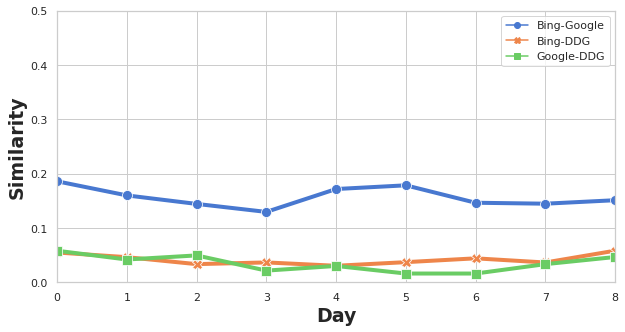

In [122]:
sns.set(style="whitegrid")

sim_data = compute_similarity_all_categories_and_pairs(results_dir, 'T', '2019', N=10)
dataframe = pd.DataFrame(sim_data, columns=['Bing-Google', 'Bing-DDG', 'Google-DDG'])
plot_consistency_plot(dataframe)

